In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from sksurv.calibration_metrics import greenwood_dagostino_nam_test, dagostino_nam_test, cook_ridker_test

In [56]:
from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()

Text(0.5, 0, 'time $t$')

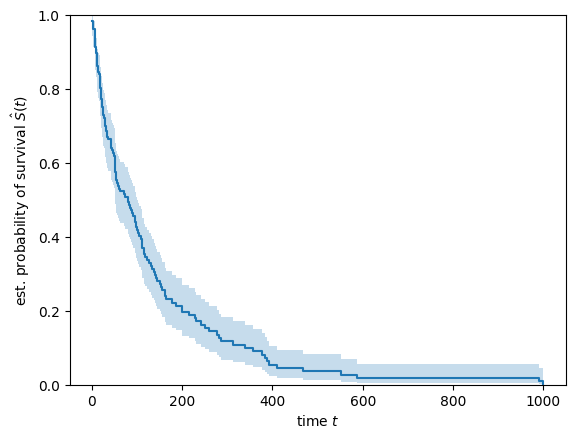

In [57]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

<Axes: xlabel='timeline'>

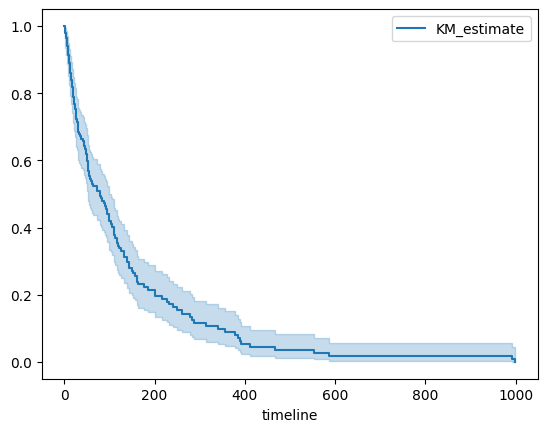

In [58]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data_y["Survival_in_days"], event_observed=data_y["Status"])  
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

Text(0.5, 0, 'time $t$')

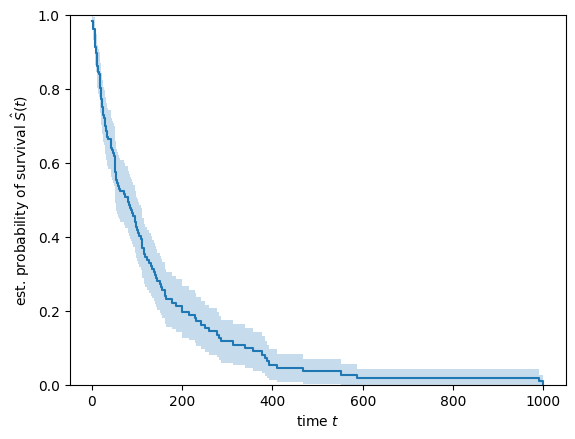

In [73]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="greenwood"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")


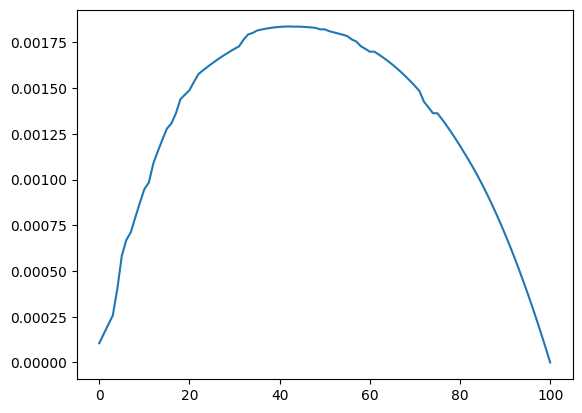

In [59]:
#from sksurv.nonparametric import test_var_kaplan_meier_estimator
#true_var= test_var_kaplan_meier_estimator(data_y["Status"], data_y["Survival_in_days"], conf_type="log-log")

from sksurv.nonparametric import variance_kaplan_meier_prob_survival
var = variance_kaplan_meier_prob_survival(survival_prob, conf_int)

#plt.plot(true_var)
plt.plot(var)

### Greenwood's confidence interval (see https://www.math.wustl.edu/%7Esawyer/handouts/greenwood.pdf)

Text(0.5, 0, 'time $t$')

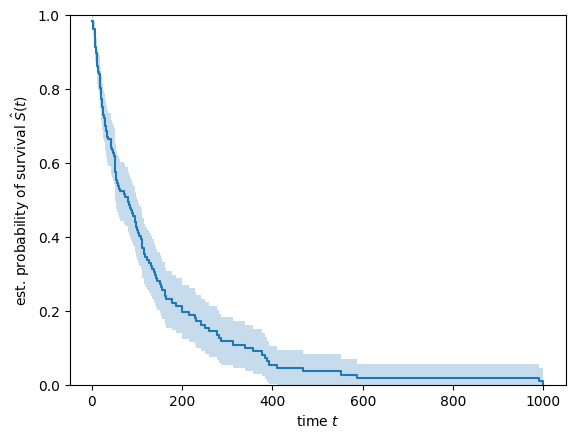

In [74]:
from scipy import stats
import numpy as np
conf_level = 0.95
z = stats.norm.isf((1.0 - conf_level) / 2.0)
greenwood_ci = survival_prob + np.array([[-1], [1]])*z*np.sqrt(var)

plt.step(time, survival_prob, where="post")
plt.fill_between(time, greenwood_ci[0], greenwood_ci[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")


In [17]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()



estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis()

In [50]:
t = 1/2

In [75]:
results = cook_ridker_test(estimator, data_x_numeric, data_y, time=t, Q=10)
results

{'test_statistic': 17.09643428720619,
 'p_value': 0.02912043608238657,
 'groupings':    Groups     N  Observations  Expectations
 0       0  14.0          14.0     14.000000
 1       1  14.0          14.0     13.999972
 2       2  13.0          13.0     12.999241
 3       3  14.0          14.0     13.977569
 4       4  14.0          14.0     13.915306
 5       5  13.0          12.0     12.853740
 6       6  14.0          14.0     13.545905
 7       7  13.0           9.7     12.142310
 8       8  14.0          14.0     12.150999
 9       9  14.0          12.6     10.330380}

In [76]:
greenwood_dagostino_nam_test(estimator, data_x_numeric, data_y, time=t, Q=10)


{'test_statistic': 5.9795782613489905,
 'p_value': 0.741960439004236,
 'groupings':    Groups     N  Observations  Expectations
 0       0  14.0          14.0     14.000000
 1       1  14.0          14.0     13.999972
 2       2  13.0          13.0     12.999241
 3       3  14.0          14.0     13.977569
 4       4  14.0          14.0     13.915306
 5       5  13.0          12.0     12.853740
 6       6  14.0          14.0     13.545905
 7       7  13.0           9.7     12.142310
 8       8  14.0          14.0     12.150999
 9       9  14.0          12.6     10.330380}

In [77]:
dagostino_nam_test(estimator, data_x_numeric, data_y, time = t, Q=10)

{'test_statistic': 17.09643428720619,
 'p_value': 0.047227068011566176,
 'groupings':    Groups     N  Observations  Expectations
 0       0  14.0          14.0     14.000000
 1       1  14.0          14.0     13.999972
 2       2  13.0          13.0     12.999241
 3       3  14.0          14.0     13.977569
 4       4  14.0          14.0     13.915306
 5       5  13.0          12.0     12.853740
 6       6  14.0          14.0     13.545905
 7       7  13.0           9.7     12.142310
 8       8  14.0          14.0     12.150999
 9       9  14.0          12.6     10.330380}

In [10]:
import numpy as np
# Generate synthetic Weibull-distributed survival data
np.random.seed(42)
num_samples = 100
time_to_event = np.random.exponential(scale=5, size=num_samples)
#survival_times = np.random.weibull(shape, num_samples) * scale
censorship = np.random.binomial(n=1, p=0.2, size=num_samples)
event_occurred = np.logical_and(time_to_event, 1 - censorship)

In [11]:
from sksurv.util import Surv

# Create the survival object
survival_data = Surv.from_arrays(event_occurred, time_to_event)

In [12]:
# Fit a Cox Proportional Hazards model to the training data
cox_model = CoxPHSurvivalAnalysis()
cox_model.fit(survival_data['time'], survival_data['event'])


ValueError: Expected 2D array, got 1D array instead:
array=[ 2.34634045 15.05060715  6.58372847  4.56471277  0.84812435  0.84798146
  0.29919384 10.05615432  4.59541077  6.15625031  0.10399654 17.51778738
  8.93214772  1.19343813  1.00339494  1.01305711  1.81376865  3.71963915
  2.82768533  1.72111496  4.73185437  0.75117264  1.72757756  2.28138609
  3.04467344  7.68968006  1.11367931  3.61014578  4.48752361  0.23781925
  4.6766651   0.93480626  0.33631965 14.86843897 16.85315171  8.26165786
  1.8164393   0.51388658  5.76375382  2.90045421  0.65076117  3.41773614
  0.17496861 12.00211444  1.49728888  5.43127899  1.86773291  3.67055448
  3.95611899  1.021943   17.46403566  7.46122689 14.0254721  11.26075999
  4.55527206 12.7471769   0.46327729  1.09067347  0.23140983  1.96766043
  2.46065146  1.58280222  8.82278933  2.206135    1.6490142   3.91203542
  0.75949074  8.10241798  0.38737934 21.6707317   7.39741888  1.1076972
  0.0276871   8.44948389  6.13547954  6.52831454  7.37607263  0.38464633
  2.21946336  0.61575052  9.94264786  4.88150596  2.00909401  0.32834033
  1.86244175  1.96657107  6.53937892  5.07444679 10.91125956  3.19533067
  0.63686197  6.24563172  7.15196377  4.11943747  7.36944983  3.40407366
  3.69839419  2.78907097  0.12873887  0.57083718].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
def test_var_kaplan_meier_estimator(
    event,
    time_exit,
    time_enter=None,
    time_min=None,
    reverse=False,
    conf_level=0.95,
    conf_type=None,
):
    
    event, time_enter, time_exit = check_y_survival(event, time_enter, time_exit, allow_all_censored=True)
    check_consistent_length(event, time_enter, time_exit)

    if conf_type is not None and reverse:
        raise NotImplementedError("Confidence intervals of the censoring distribution is not implemented.")

    if time_enter is None:
        uniq_times, n_events, n_at_risk, n_censored = _compute_counts(event, time_exit)

        if reverse:
            n_at_risk -= n_events
            n_events = n_censored
    else:
        if reverse:
            raise ValueError("The censoring distribution cannot be estimated from left truncated data")

        uniq_times, n_events, n_at_risk = _compute_counts_truncated(event, time_enter, time_exit)

    # account for 0/0 = nan
    ratio = np.divide(
        n_events,
        n_at_risk,
        out=np.zeros(uniq_times.shape[0], dtype=float),
        where=n_events != 0,
    )
    values = 1.0 - ratio

    if conf_type is not None:
        ratio_var = np.divide(
            n_events,
            n_at_risk * (n_at_risk - n_events),
            out=np.zeros(uniq_times.shape[0], dtype=float),
            where=(n_events != 0) & (n_at_risk != n_events),
        )

    if time_min is not None:
        mask = uniq_times >= time_min
        uniq_times = np.compress(mask, uniq_times)
        values = np.compress(mask, values)

    prob_survival = np.cumprod(values)

    if conf_type is None:
        return uniq_times, prob_survival

    if time_min is not None:
        ratio_var = np.compress(mask, ratio_var)

    var_prob_survival = prob_survival**2 * np.cumsum(ratio_var)

    return var_prob_survival

In [ ]:

def variance_kaplan_meier_prob_survival_from_ci(survival_prob, ci, conf_type="log-log", conf_level=0.95):
    """Variance of the Kaplan-Meier estimator of survival function. Computed using Greenwood's approximation
    """
    if conf_type not in {"log-log"}:
        raise ValueError(f"conf_type must be None or a str among {{'log-log'}}, but was {conf_type!r}")

    if not isinstance(conf_level, numbers.Real) or not np.isfinite(conf_level) or conf_level <= 0 or conf_level >= 1.0:
        raise ValueError(f"conf_level must be a float in the range (0.0, 1.0), but was {conf_level!r}")

    z = stats.norm.isf((1.0 - conf_level) / 2.0)
    eps = np.finfo(survival_prob.dtype).eps
    log_p = np.log(survival_prob, where=survival_prob > eps, out=np.zeros_like(survival_prob))
    
    theta = np.divide(np.log(ci[1,:]), log_p, where= (np.abs(log_p)>eps) & (ci[1,:]>eps), out = np.zeros_like(survival_prob))
    np.log(theta, where = theta>eps, out = theta)
    sigma_t = theta * log_p /z

    var_survival_prob = survival_prob**2 * sigma_t**2
    return var_survival_prob


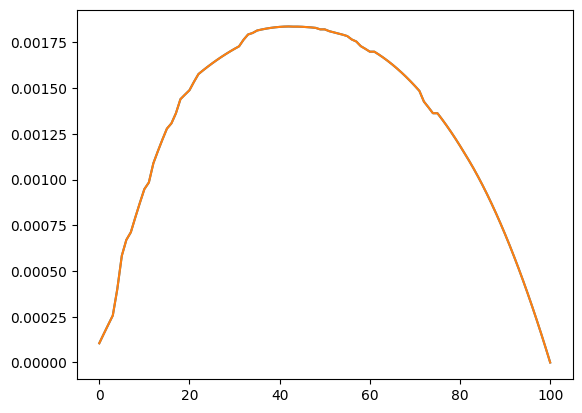

In [85]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator, exact_variance_kaplan_meier_prob_survival

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="greenwood"
)

exact_var = exact_variance_kaplan_meier_prob_survival(
    data_y["Status"], data_y["Survival_in_days"], conf_type="greenwood"
)

var = variance_kaplan_meier_prob_survival(survival_prob, conf_int)

plt.plot(exact_var)
plt.plot(var)